# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Inside main ...
Inside load() ...
Done loading data
Inside dataSum()...
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43
Inside dataExploration()...


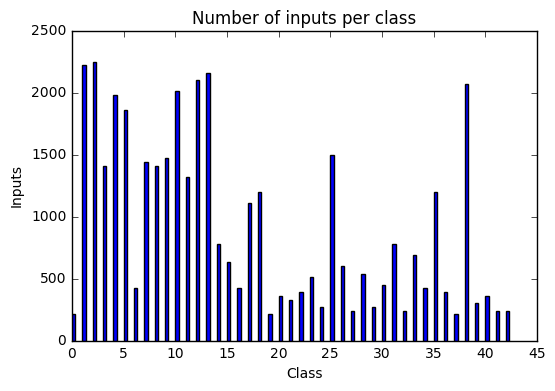

Class:  0


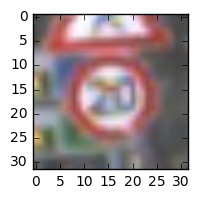

Class:  1


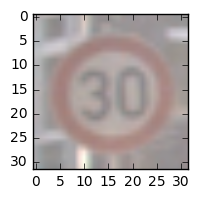

Class:  2


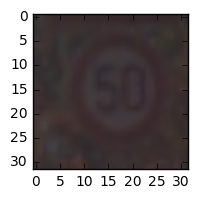

Class:  3


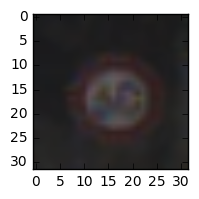

Class:  4


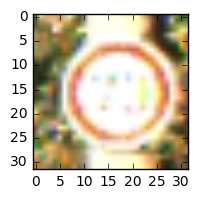

Class:  5


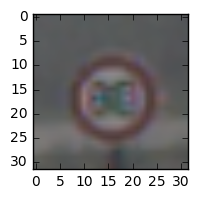

Class:  6


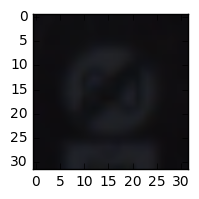

Class:  7


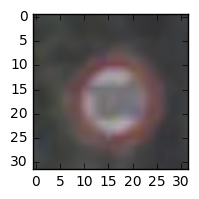

Class:  8


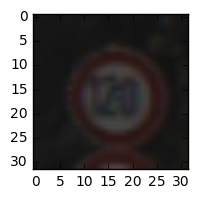

Class:  9


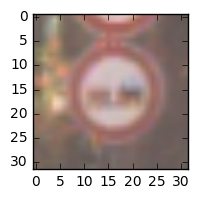

Class:  10


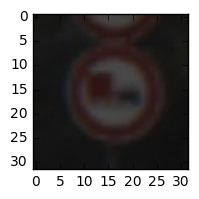

Class:  11


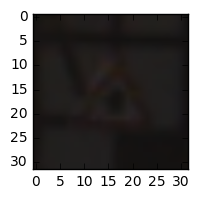

Class:  12


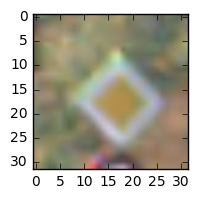

Class:  13


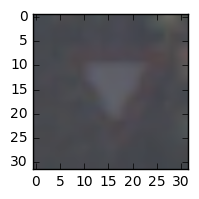

Class:  14


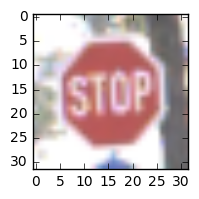

Class:  15


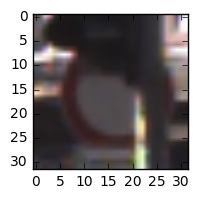

Class:  16


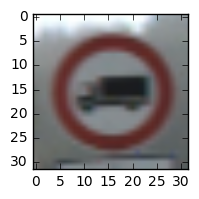

Class:  17


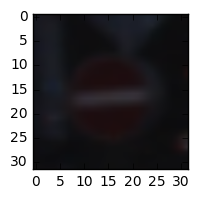

Class:  18


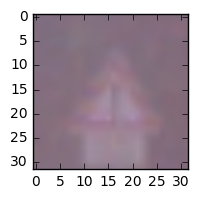

Class:  19


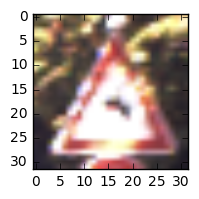

Class:  20


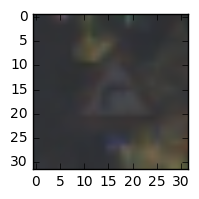

Class:  21


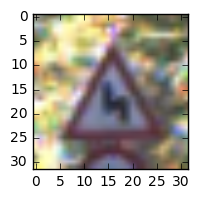

Class:  22


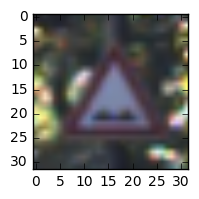

Class:  23


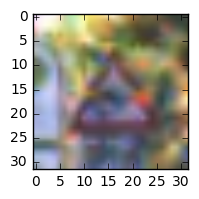

Class:  24


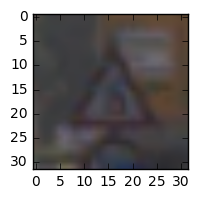

Class:  25


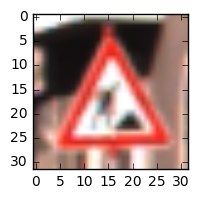

Class:  26


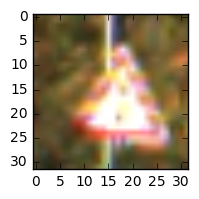

Class:  27


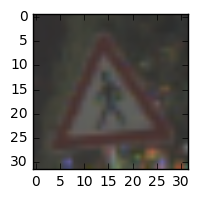

Class:  28


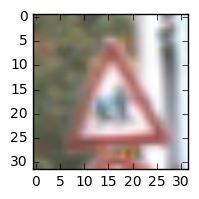

Class:  29


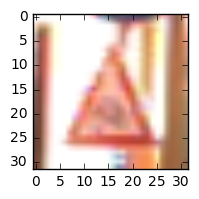

Class:  30


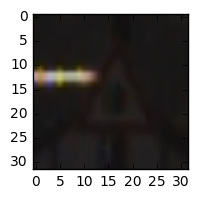

Class:  31


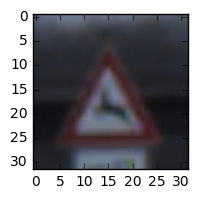

Class:  32


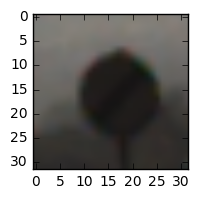

Class:  33


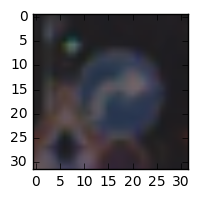

Class:  34


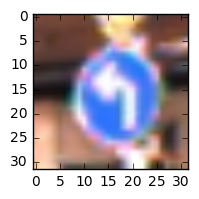

Class:  35


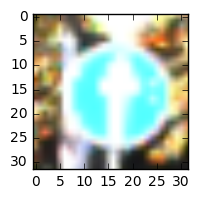

Class:  36


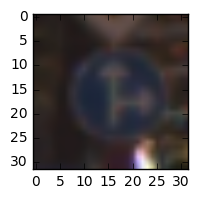

Class:  37


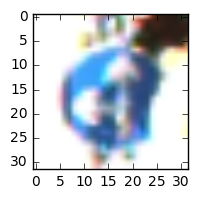

Class:  38


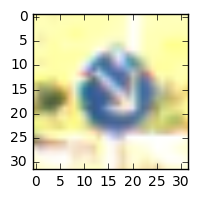

Class:  39


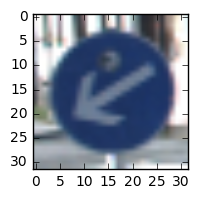

Class:  40


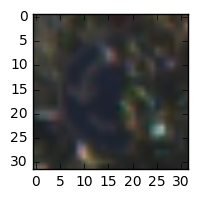

Class:  41


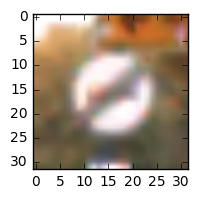

Class:  42


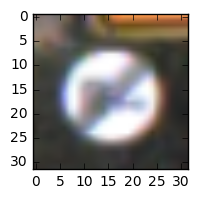

Inside preProcess() ...
Generating additional data...
Normalizing features...


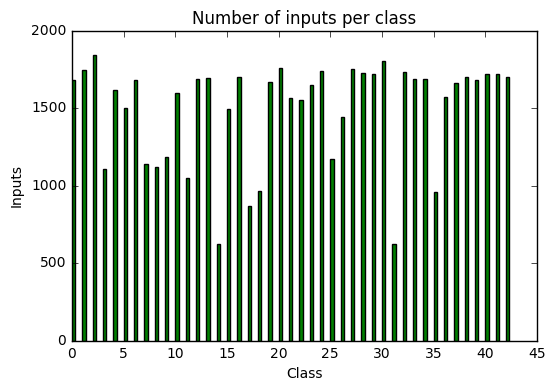

Inside createNeuralNet()...
dadadas None
Instructions for updating:
Use `tf.global_variables_initializer` instead.


Epoch 10/10: 100%|██████████| 128/128 [01:37<00:00,  1.32batches/s]


 Validation accuracy:  nan
 Test accuracy:  nan


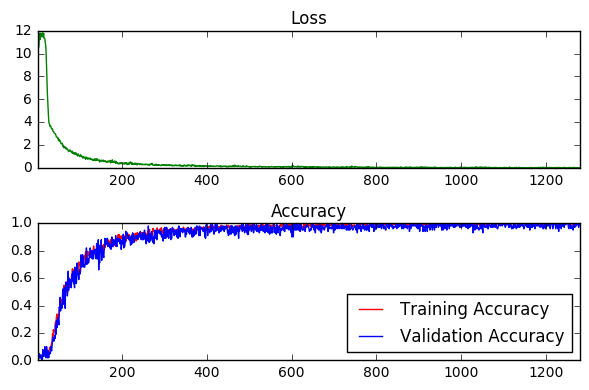

Inside save model
Trained model saved at: /home/carnd/CarND-Traffic-Sign-Classifier-Project/model/model.ckpt
Hello
Accuracy on Test-Set: 86.6% (10935 / 12630)
Confusion Matrix:


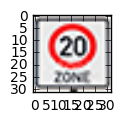

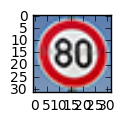

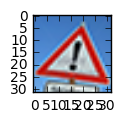

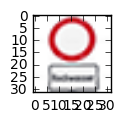

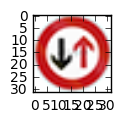

[[  5.15214205e-02   4.36630519e-03   1.64194513e-04   1.87307820e-02
    4.22670447e-16   4.75003191e-07   6.29454488e-26   1.92252925e-09
    9.54189283e-10   4.97914407e-05   1.44978651e-14   1.15922084e-16
    2.22480235e-17   9.21898603e-01   5.76628508e-06   4.87900905e-14
    1.13939632e-15   4.91397373e-07   1.09378402e-15   5.20318820e-21
    1.91320751e-10   3.26201520e-28   4.95008384e-16   3.65143939e-16
    1.66364196e-13   7.60706200e-08   1.76746574e-24   2.40967497e-22
    3.26198828e-03   4.27720392e-09   6.66836114e-24   4.20181890e-16
    1.34068093e-20   4.06510773e-31   8.68875067e-26   6.74170862e-19
    3.05829473e-21   6.58895640e-26   1.70201513e-14   9.29374121e-30
    2.46677850e-24   8.50216137e-17   1.64328441e-25]
 [  6.76688089e-13   1.15782479e-02   2.43426766e-02   9.53306675e-01
    1.05273198e-18   1.07724108e-02   3.79305968e-25   2.25120475e-21
    1.01270342e-26   4.00840254e-21   3.15959536e-20   2.00553119e-32
    1.25526209e-35   1.21967085e-21 

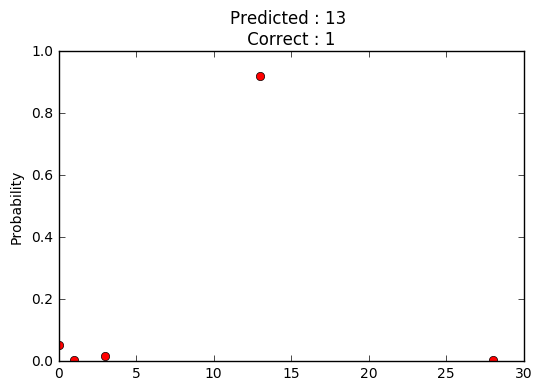

raw top_k results:
tf.nn.top_k.values [0.9218986, 0.05152142, 0.018730782, 0.0043663052, 0.0032619883]
tf.nn.top_k.indices [13, 0, 3, 1, 28]
Inside i 1


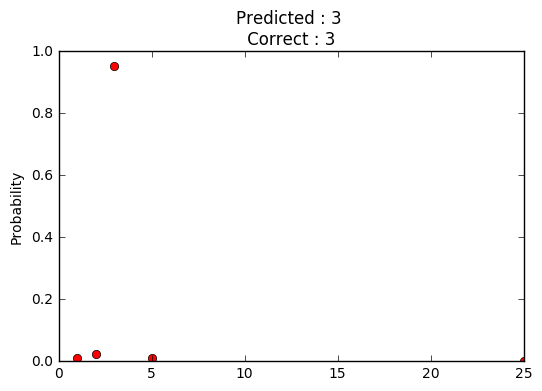

raw top_k results:
tf.nn.top_k.values [0.95330667, 0.024342677, 0.011578248, 0.010772411, 6.9603719e-13]
tf.nn.top_k.indices [3, 2, 1, 5, 25]
Inside i 2


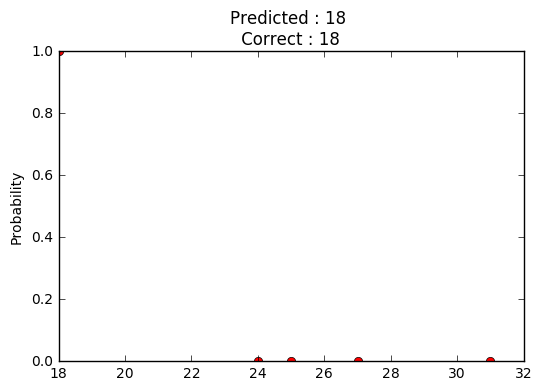

raw top_k results:
tf.nn.top_k.values [0.99999213, 5.1078855e-06, 1.4299042e-06, 5.6539221e-07, 4.3363437e-07]
tf.nn.top_k.indices [18, 24, 31, 27, 25]
Inside i 3


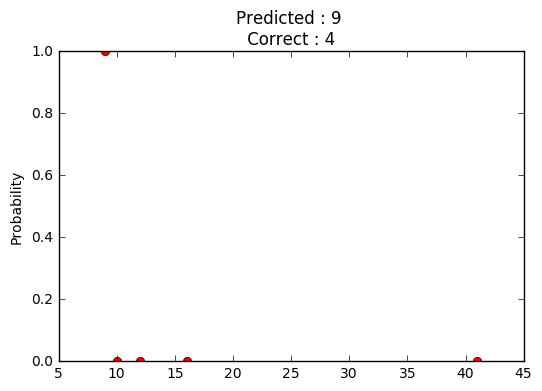

raw top_k results:
tf.nn.top_k.values [0.99999833, 1.6370442e-06, 4.7009731e-08, 8.2477497e-10, 7.1866013e-10]
tf.nn.top_k.indices [9, 12, 41, 16, 10]
Inside i 4


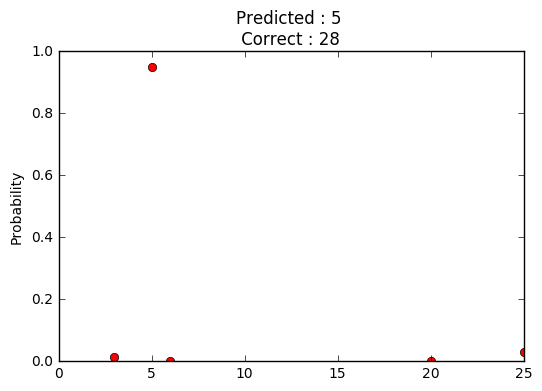

raw top_k results:
tf.nn.top_k.values [0.95101893, 0.030615969, 0.014757494, 0.0019704958, 0.001604806]
tf.nn.top_k.indices [5, 25, 3, 20, 6]


In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage
import tensorflow as tf
from tqdm import tqdm
from pylab import rcParams
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

plot=True
training_epochs = 100
training_epochs = 10
log_batch_step = 100
log_batch_step = 1
batch_size = 500
test_batch_size = 250
test_batch_size = 10
img_shape = (32, 32, 3)



def plot_probabilities(pred_cls, pred_prob, title) :

    plt.plot(list(pred_cls), list(pred_prob), 'ro')
    #x1,x2,y1,y2 = plt.axes()
    #plt.axes((x1-1, x2+1, y1, y2+0.1))
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()





def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    plt.figure(figsize=(1,1))
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(np.argmax(cls_true[i]))
        else:
            xlabel = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i]), np.argmax(cls_pred[i]))
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

def plot_confusion_matrix(cls_pred):
    cm = confusion_matrix(y_true=test_cls,
                          y_pred=cls_pred)

    plt.figure(figsize=(40,40))
    rcParams['figure.figsize'] = 13, 13
    plt.matshow(cm)
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, range(n_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def plot_example_errors(cls_pred, correct):

    incorrect = (correct == False)
    images = test_features[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = test_cls[incorrect]
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

def print_test_accuracy(session,test_features,oh_test_labels,test_cls,y_pred_cls,show_example_errors=False, show_confusion_matrix=False):

    num_test = len(test_features)
    cls_pred = np.zeros(shape=num_test, dtype=np.int)
    i = 0

    while i < num_test:

        j = min(i + test_batch_size, num_test)

        batch_features = test_features[i:j]
        batch_labels   = oh_test_labels[i:j]

        feed_dict = {input_ph: batch_features, labels_ph: batch_labels}

        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        i = j

    correct = (test_cls == cls_pred)
    correct_sum = correct.sum()

    acc = float(correct_sum) / num_test

    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    if show_example_errors:
        print("Example errors:")
        #plot_example_errors(cls_pred=cls_pred, correct=correct)

    if show_confusion_matrix:
        print("Confusion Matrix:")
        #plot_confusion_matrix(cls_pred=cls_pred)

def load() :

    print('Inside load() ...')
    # Load pickled data
    import pickle

    training_file = './data/train.p'
    testing_file = './data/test.p'

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    train_features, train_labels = train['features'], train['labels']
    test_features, test_labels = test['features'], test['labels']

    print('Done loading data')

    return  train_features, train_labels, test_features, test_labels

def dataSum(train_features, test_features) :

    print('Inside dataSum()...')

    n_train = len(train_features)
    n_test = len(test_features)
    image_shape = "{}x{}".format(len(train_features[0]), len(train_features[0][0]))
    n_classes = max(train_labels) + 1

    print("Number of training examples =", n_train)
    print("Number of testing examples =", n_test)
    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)

    return n_classes

def dataExploration(train_features, train_labels, test_features, test_labels) :

    print('Inside dataExploration()...')

    train_features = np.array(train_features)
    train_labels = np.array( train_labels)

    inputs_per_class = np.bincount(train_labels)
    max_inputs = np.max(inputs_per_class)

    if plot :

        mpl_fig = plt.figure()
        ax = mpl_fig.add_subplot(111)
        ax.set_ylabel('Inputs')
        ax.set_xlabel('Class')
        ax.set_title('Number of inputs per class')
        ax.bar(range(len(inputs_per_class)), inputs_per_class, 1 / 3, color='blue', label='Inputs per class')
        plt.show()

       
        for i in range(n_classes):
            for j in range(len(train_labels)):
                if (i == train_labels[j]):
                    print('Class: ', i)
                    plt.figure(figsize=(2,2))
                    plt.imshow(train_features[j])
                    plt.show()
                    break



    return (inputs_per_class,max_inputs)

def preProcess(inputs_per_class,max_inputs,train_features,train_labels) :
    print('Inside preProcess() ...')
    # Generate additional data for underrepresented classes
    print('Generating additional data...')
    angles = [-5, 5, -10, 10, -15, 15, -20, 20, -25, 25]

    for i in range(len(inputs_per_class)):
        input_ratio = min(int(max_inputs / inputs_per_class[i]) - 1, len(angles) - 1)

        if input_ratio <= 1:
            continue

        new_features = []
        new_labels = []
        mask = np.where(train_labels == i)

        for j in range(input_ratio):
            for feature in train_features[mask]:
                new_features.append(scipy.ndimage.rotate(feature, angles[j], reshape=False))
                new_labels.append(i)

        train_features = np.append(train_features, new_features, axis=0)
        train_labels = np.append(train_labels, new_labels, axis=0)

    # Normalize features
    print('Normalizing features...')

    train_features = train_features / 255. * 0.8 + 0.1

    # Get 20% of training data as validation data

    train_features, valid_features, train_labels, valid_labels = train_test_split(
        train_features,
        train_labels,
        test_size=0.2,
        random_state=832289
    )
    if plot :
        inputs_per_class = np.bincount(train_labels)
        mpl_fig = plt.figure()
        ax = mpl_fig.add_subplot(111)
        ax.set_ylabel('Inputs')
        ax.set_xlabel('Class')
        ax.set_title('Number of inputs per class')
        ax.bar(range(len(inputs_per_class)), inputs_per_class, 1 / 3, color='green', label='Inputs per class')
        plt.show()

    return train_features, valid_features, train_labels, valid_labels

def createNeuralNet(train_features, valid_features, train_labels, valid_labels) :

    print('Inside createNeuralNet()...')

    # Input dimensions
    image_width = len(train_features[0][0])
    image_height = len(train_features[0])
    color_channels = len(train_features[0][0][0])

    # Convolutional layer patch dinmension and output size
    # filter is based on 3*3 window
    filter_width = 3
    filter_height = 3

    #128 for k is reasonable
    conv_k_output = 128

    # Dimension parameters for each fully connected layer
    # It follows reduced dimension for first to second and 3 to fourth

    # List to hold fully connected layer dimension details.
    # With this technique, we can add more layers dynamically without chaning the code

    fc_params = [
        image_width * image_height * conv_k_output,
        1024,
        1024,
        n_classes
    ]

    # Build weights and biases
    conv2d_weight = None
    conv2d_bias = None
    fc_weights = []
    fc_biases = []

    with tf.variable_scope('BONHOMME', reuse=False):

        conv2d_weight = tf.get_variable("conv2w", shape=[filter_width, filter_height, color_channels, conv_k_output],
                                        initializer=tf.contrib.layers.xavier_initializer())

        conv2d_bias   = tf.get_variable("conv2b", shape=[conv_k_output],
                                      initializer=tf.contrib.layers.xavier_initializer())

        for i in range(len(fc_params) - 1):

            fc_weights.append(tf.get_variable('fc_weight' + str(i), shape=[fc_params[i], fc_params[i + 1]],
                                              initializer=tf.contrib.layers.xavier_initializer()))

            fc_biases.append(tf.get_variable('fc_bias' + str(i), shape=[fc_params[i + 1]],
                                             initializer=tf.contrib.layers.xavier_initializer()))

    # hot encoded training and validation labels
    oh_train_labels = tf.one_hot(train_labels, n_classes).eval(session=tf.Session())
    oh_valid_labels = tf.one_hot(valid_labels, n_classes).eval(session=tf.Session())

    # Input placeholders
    input_ph = tf.placeholder(tf.float32, shape=[None, image_width, image_height, color_channels])
    labels_ph = tf.placeholder(tf.float32)

    # Convolutional layer
    network = tf.nn.conv2d(input_ph, conv2d_weight, strides=[1, 1, 1, 1], padding='SAME')
    network = tf.nn.bias_add(network, conv2d_bias)
    network = tf.nn.relu(network)

    # Fully connected convolutional layers
    # read from the list ...

    for i in range(len(fc_weights)):

        network = tf.matmul(tf.contrib.layers.flatten(network), fc_weights[i]) + fc_biases[i]
        if i < len(fc_weights) - 1:  # No relu after last FC layer
            network = tf.nn.relu(network)

    # Loss computation, cross entropy for the last network (output..)
    prediction = tf.nn.softmax(network)
    cross_entropy = -tf.reduce_sum(labels_ph * tf.log(prediction + 1e-6), reduction_indices=1)
    loss = tf.reduce_mean(cross_entropy)

    # Accuracy computation
    is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels_ph, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))
    
    saver = tf.train.Saver()
    
    return input_ph, labels_ph, oh_train_labels, oh_valid_labels, loss, accuracy,prediction,saver

def plotTrainingAccuracy(batches, loss_batch,train_acc_batch, valid_acc_batch):

    loss_plot = plt.subplot(211)
    loss_plot.set_title('Loss')
    loss_plot.plot(batches, loss_batch, 'g')
    loss_plot.set_xlim([batches[0], batches[-1]])
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
    acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
    acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([batches[0], batches[-1]])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()

def run_batch(session, batch_count, network,features, labels):

    accuracy = 0
    for i in range(batch_count):
        batch_start = i * batch_size
        accuracy += session.run(
            network,
            feed_dict={
                input_ph: features[batch_start:batch_start + batch_size],
                labels_ph: labels[batch_start:batch_start + batch_size]
            }
        )

    return accuracy / batch_count

def runNeuralNet(input_ph,labels_ph,oh_train_labels,oh_valid_labels,oh_test_labels,loss,accuracy):

    # Use Adam Optimizer as suggested in lectures
    optimizer = tf.train.AdamOptimizer().minimize(loss)

    batches = []
    loss_batch = []
    train_acc_batch = []
    valid_acc_batch = []
    validation_accuracy = 0.0

    init = tf.initialize_all_variables()
    session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
    session.run(init)

    batch_count = int(len(train_features) / batch_size)

    for epoch in range(training_epochs):

        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch + 1, training_epochs),
                            unit='batches')

        # The training cycle
        for batch_i in batches_pbar:

            batch_start = batch_i * batch_size
            batch_features = train_features[batch_start:batch_start + batch_size]
            batch_labels = oh_train_labels[batch_start:batch_start + batch_size]

            _, l = session.run(
                [optimizer, loss],
                feed_dict={input_ph: batch_features, labels_ph: batch_labels})

            if not batch_i % log_batch_step:

                ## Check training & validation accuracy for every specified window
                training_accuracy = session.run( accuracy, feed_dict={input_ph: batch_features, labels_ph: batch_labels}
                )

                idx = np.random.randint(len(valid_features), size=int(batch_size * .2))
                validation_accuracy = session.run(
                    accuracy,
                    feed_dict={input_ph: valid_features[idx, :], labels_ph: oh_valid_labels[idx, :]}
                )

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)


    ## Run against validaton set
    validation_accuracy = run_batch(session, batch_count, accuracy,valid_features, oh_valid_labels)

    ## Run against test data set
    test_accuracy = run_batch(session, batch_count, accuracy,test_features, oh_test_labels)

    print(' Validation accuracy: ', validation_accuracy)
    print(' Test accuracy: ', test_accuracy)

    if plot :
        plotTrainingAccuracy(batches, loss_batch,train_acc_batch, valid_acc_batch)

    ## return session - needed for manual validation...

    return session



def saveModel(sess,saver) :

    print ("Inside save model")
    MODEL_SAVE_PATH = "/home/carnd/CarND-Traffic-Sign-Classifier-Project/model/model.ckpt"
    save_path = saver.save(sess, MODEL_SAVE_PATH)
    print("Trained model saved at:", save_path)

def getSession(saver) :
    
    return None
    print ("Inside load model")
    save_file = '/home/carnd/CarND-Traffic-Sign-Classifier-Project/model/model.ckpt'

    import os
    
    if os.path.isfile(save_file+".meta") :
    
        #tf.reset_default_graph()
        with tf.Session() as sess:
            saver.restore(sess, tf.train.latest_checkpoint('/home/carnd/CarND-Traffic-Sign-Classifier-Project/model'))

        #tf.train.latest_checkpoint('.'))
        #saver = tf.train.import_meta_graph(save_file+".meta")
        #sess = tf.Session()
        #saver.restore(sess, save_file)

        #with tf.Session() as sess:
        # new_saver = tf.train.import_meta_graph("/home/carnd/CarND-Traffic-Sign-Classifier-Project/model")
        # new_saver.restore(sess, tf.train.latest_checkpoint('./'))
        # saver.restore(sess, save_file)
        # saver.restore(sess, tf.train.latest_checkpoint('.'))
        
        return sess
    else :
        return None

if __name__ == '__main__':

    print ("Inside main ...")
     
    #load data
    (train_features, train_labels, test_features, test_labels)  = load()

    #summary of loaded input data set
    n_classes = dataSum(train_features, test_features)

    #explore data ser
    (inputs_per_class, max_inputs) = dataExploration(train_features, train_labels, test_features, test_labels)

    #pre process the data, normalize the data set by creating new data set by slightly modifying available ones
    (train_features, valid_features, train_labels, valid_labels) = \
        preProcess(inputs_per_class, max_inputs,train_features,train_labels)

    #create fully convolutional neural net
    (input_ph, labels_ph, oh_train_labels, oh_valid_labels, loss, accuracy,prediction,saver) \
        = createNeuralNet(train_features, valid_features, train_labels, valid_labels)

    #create test labels
    test_features = np.array(test_features) / 255 * 0.8 + 0.1
    oh_test_labels = tf.one_hot(test_labels, n_classes).eval(session=tf.Session())

    #run the neural net

    session = getSession(saver)
    print ("dadadas",session)
    
    if session == None :
        
        session = runNeuralNet(input_ph, labels_ph, oh_train_labels, oh_valid_labels, oh_test_labels, loss, accuracy)
        saveModel(session,saver)
        print ("Hello")

        #predict
        y_pred_cls = tf.argmax(prediction, dimension=1)
        test_cls = np.argmax(oh_test_labels, axis=1)

        #test the accuracy
        print_test_accuracy(session,test_features,oh_test_labels,test_cls,y_pred_cls,
                            show_example_errors=False, show_confusion_matrix=True)

    imgs = ['20.png', '80.png', 'exclamation.png', 'hochwasser.png', 'priority.png']

    new_input = []
    actual_class = [1,3,18,4,28]

    for imgname in imgs:
        image = mpimg.imread('images/' + imgname)
        new_input.append(image)

        if plot :
            plt.figure(figsize=(1,1))
            plt.imshow(image)
            plt.show()


    new_predictions = session.run(prediction, feed_dict={input_ph: new_input})
    print(new_predictions)

    top_k_probabilities = (session.run(tf.nn.top_k(prediction, k=5), feed_dict={input_ph: new_input}))

    print ("TOPK Prob",top_k_probabilities)
    import pandas as pd
    values = np.array(top_k_probabilities.values)
    indices = np.array(top_k_probabilities.indices)
    
    print ("VALUES:", values)
    print ("INDICES", indices)

    for i in range(len(values)) :
        
        print ("Inside i",i)
        pred_class = indices[i][np.argmax(values[i])]
        correct_class = actual_class[i]
        plot_title = "Predicted : {} \n Correct : {} ".format(pred_class, correct_class)

        plot_probabilities(indices[i], values[i], plot_title)

        print ("raw top_k results:")
        print ("tf.nn.top_k.values", list(values[i]))
        print ("tf.nn.top_k.indices", list(indices[i]))

        

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:

# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0





Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0




### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

    


In [5]:
"""

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43

In addition to the above info, I also printed distribution of classes among input data set. 
If you notice the bar chart (No of input/class) in the output, 
class 5, 21,22,23,25,36,39 etc have very low level of representation.

Just for simplicity reason and to avoid overfitting of low representation classes, I decided to
include more images for those classes via simulation. Basically, I changed the angles of those classes
having less representation and tried to increase the representation.

angles = [-5, 5, -10, 10, -15, 15, -20, 20, -25, 25]
   
In real life project, I would think that in addition to simulation, we should attempt get more of real images if
the representation is low for some classes.

I also normalized all the values to that there is less variance of the input data set

"""




'\n\nNumber of training examples = 39209\nNumber of testing examples = 12630\nImage data shape = 32x32\nNumber of classes = 43\n\nIn addition to the above info, I also printed distribution of classes among input data set. \nIf you notice the bar chart (No of input/class) in the output, \nclass 5, 21,22,23,25,36,39 etc have very low level of representation.\n\nJust for simplicity reason and to avoid overfitting of low representation classes, I decided to\ninclude more images for those classes via simulation. Basically, I changed the angles of those classes\nhaving less representation and tried to increase the representation.\n\nangles = [-5, 5, -10, 10, -15, 15, -20, 20, -25, 25]\n   \nIn real life project, I would think that in addition to simulation, we should attempt get more of real images if\nthe representation is low for some classes.\n\nI also normalized all the values to that there is less variance of the input data set\n\n'


### Question 2

Describe how you set up the training, validation and testing data for your model. 

**Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [6]:
"""
### Define your architecture here.

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43

** I have explained the technique of additional data generation in Question 1 answer.  The additional data set
have slightly twisted angle

About validation data set, as listed below, I have used train_test_split function
to divide the input set (20%) for validation.

train_features, valid_features, train_labels, valid_labels = train_test_split(train_features,train_labels,test_size=0.2,)

"""





'\n### Define your architecture here.\n\nNumber of training examples = 39209\nNumber of testing examples = 12630\nImage data shape = 32x32\nNumber of classes = 43\n\n** I have explained the technique of additional data generation in Question 1 answer.  The additional data set\nhave slightly twisted angle\n\nAbout validation data set, as listed below, I have used train_test_split function\nto divide the input set (20%) for validation.\n\ntrain_features, valid_features, train_labels, valid_labels = train_test_split(train_features,train_labels,test_size=0.2,)\n\n'

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [7]:

"""
First layer is a CNN with a 

        patch size of 3*3, 
        a stride of 1, 
        SAME padding and a depth of 128

Second layers are fully connected layers with a width of 1024

Third layers are fully connected layers with a width of 1024

The final layer is a fully connected layer with a width of 43

"""







'\nFirst layer is a CNN with a \n\n        patch size of 3*3, \n        a stride of 1, \n        SAME padding and a depth of 128\n\nSecond layers are fully connected layers with a width of 1024\n\nThird layers are fully connected layers with a width of 1024\n\nThe final layer is a fully connected layer with a width of 43\n\n'

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**


I used the Adam optimizer with a learning rate of 0.001
I used a batch size of 250 and 10 training epochs

The training epochs are configurable in the top of the program.

It was taking more than 15 mins to train  10 epochs. In the interest of time to complete the project
I have choosen 10 epochs. However in real life, we would run with 100 or so epcohs to get the accuracy/error reate properly.

After many tests, the learning rate of 0.001 seemed to learn fast enough without getting stuck in a local minimum.








### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._


**Answer:**

First I tried to create a 7 layer network as below

http://blog.christianperone.com/2015/08/convolutional-neural-networks-and-feature-extraction-with-python/


  layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            

However, I was not able to run it successfully in amazon GPU as it was hangling in the middle for some reason.

Then, I tried simpe 4 layer fully connected network. The fully connected neuural network is simplified and seems OK
for the images provided as part of the data set. Medium sized network (4 layers with 2 layers having 1024 depth) as the signs are overall pretty simple in shape and color.

I observed that with in 20 epochs, the accuracy is reaching the maximum





---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.



You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.


# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I have 5 candiadate images 

20.png
80.png
exclamation.png
hochwasser.png
priority.png

20, 80 and exclamation images are very similar to the one in input data set. Last two are completely random image from the web.

First 3 images are classified properly. Last two are not and it false positive 


In [9]:
### Run the predictions here.
### Feel free to use as many code cells as needed.


# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

First 3 candiate images are classified properly. Last two are not and it false positive. 


In [10]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed


# I have included all code required for this assignment in the step 0.  Though Ipython is great,
# I found that I am more efficient in thinking and coding in pycharm editor with less cluttering on documentation
# and with more functions for code managebility
# If you run the step 0, it will all the steps
# I request you to review the complete code block in Step 0



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.



**Answer:**

Please look at the tf.nn.top_k output and visual output of tf.nn.top_k probablities vs class. Here is the summary of softmax probability and prediction.

First image is about speed sign 20: The network seems like confused. It predicted the different classw where it matches partially. Though the training had sign 20 image, the network predicted different image where part of sign 20 post is present. It is uncertain about the prediction as the max prob is lower.

Second image is about speed sign 80 : Predicted correctly (with high certainty) though the training image was not very clear

Third image :  Predicted correctly with high probability and certainty. 

Forth image :  The network seems to have done a poor job of learning this class. There is no similar image in the training set and the predicted one is not looking close to any of images used for training

Figth image :  Network seems to got confused and predicted wrong one.






> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.